In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

$\textbf{Problem 1}$

$\textbf{Part a)}$


Hence the Markov matrix P can be written as:

$$
P = \begin{bmatrix}
1.0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0.9 & 0 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0.8 & 0 & 0.2 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0.7 & 0 & 0.3 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0.6 & 0 & 0.4 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0.4 & 0 & 0.6 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0.3 & 0 & 0.7 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.2 & 0 & 0.8 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.9 \\
\end{bmatrix}$$



In [2]:
P = [[1,0,0,0,0,0,0,0,0,0],[0.9,0,0.1,0,0,0,0,0,0,0], [0,0.8,0,0.2,0,0,0,0,0,0],[0,0,0.7,0,0.3,0,0,0,0,0],[0,0,0,0.6,0,0.4,0,0,0,0],[0,0,0,0,0.5,0,0.5,0,0,0],[0,0,0,0,0,0.4,0,0.6,0,0],[0,0,0,0,0,0,0.3,0,0.7,0],[0,0,0,0,0,0,0,0.2,0,0.8],[0,0,0,0,0,0,0,0,0.1,0.9]]
P = np.array(P)

In [3]:
stateSpace = range(0,10)

def simulation(initialState, T):
    state = initialState
    sales = 0
    for n in range(0, T):
        if state == 0:
            # We can stop since enthusiasm dropped to its lowest level
            break
        probabilities = P[state]
        newState = np.random.choice(a=stateSpace, p=probabilities)
        if newState >= state:
            sales += 1
        
        state = newState
    
    return sales

In [4]:
trials = 10_000
T = 1_000
#sales = [[0 for _ in range(0,trials)] for _ in range(0, 9)]
sales = np.zeros((10, trials))
for initialState in stateSpace:
    for k in range(0,trials):
        sales[initialState][k] = simulation(initialState, T)

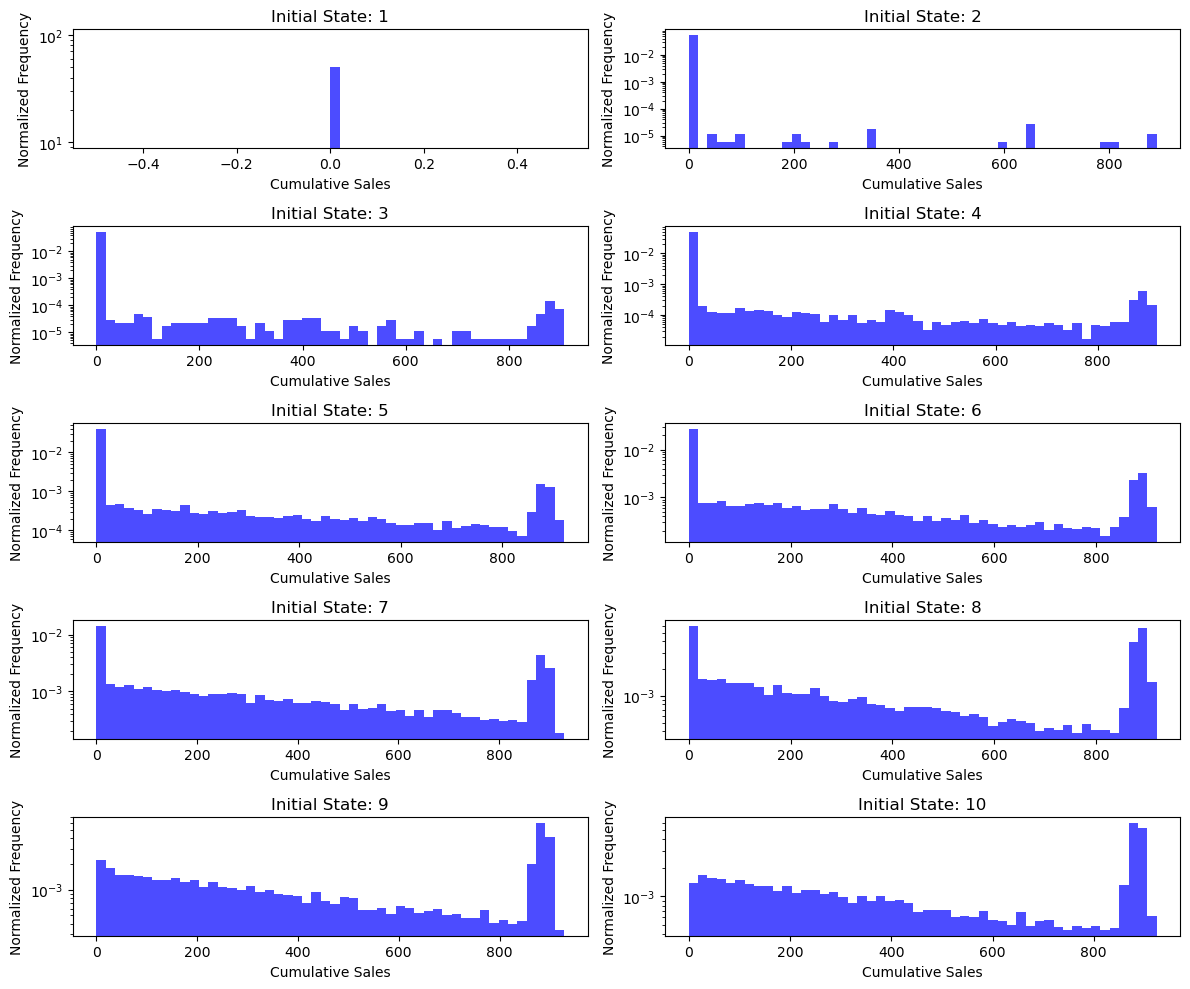

In [5]:
bins = 50  

fig, axes = plt.subplots(5, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(sales[i], bins=bins, color='blue', alpha=0.7, density=True)
    ax.set_yscale('log')
    #ax.set_xscale('log')
    ax.set_title(f"Initial State: {i + 1}")
    ax.set_xlabel("Cumulative Sales")
    ax.set_ylabel("Normalized Frequency")

plt.tight_layout()

plt.show()

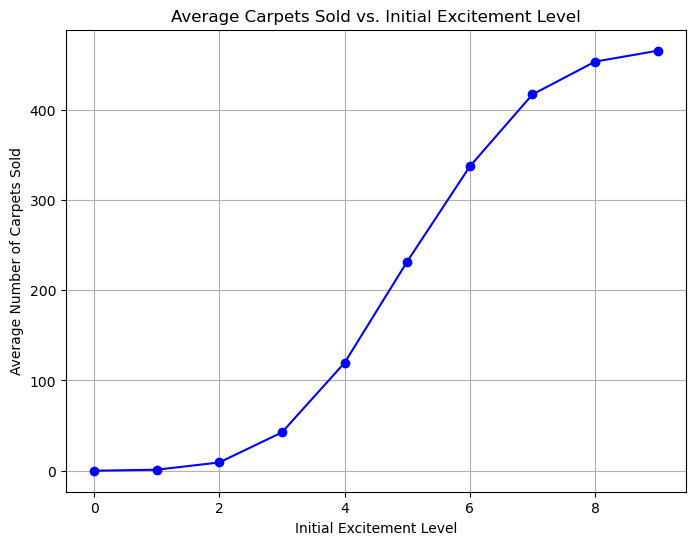

In [6]:
average_sales = np.mean(sales, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(stateSpace, average_sales, marker='o', linestyle='-', color='blue')

plt.xlabel("Initial Excitement Level")
plt.ylabel("Average Number of Carpets Sold")
plt.title("Average Carpets Sold vs. Initial Excitement Level")
plt.grid(True)

plt.show()

In [7]:
def simulation_with_time(initialState, T):
    state = initialState
    sales = 0
    steps = 0
    for n in range(T):
        if state == 0:
            break
        probabilities = P[state]
        newState = np.random.choice(a=stateSpace, p=probabilities)
        if newState > state:
            sales += 1
        state = newState
        steps += 1
        if sales == 5:
            return steps

    return -1

In [8]:
trials = 10_000
T = 1_000
times_to_sell_5 = np.full((10, trials), -1)

for initialState in range(10):  # Assuming stateSpace is [0, 1, 2, ..., 9]
    for k in range(trials):
        result = simulation_with_time(initialState, T)
        times_to_sell_5[initialState][k] = result


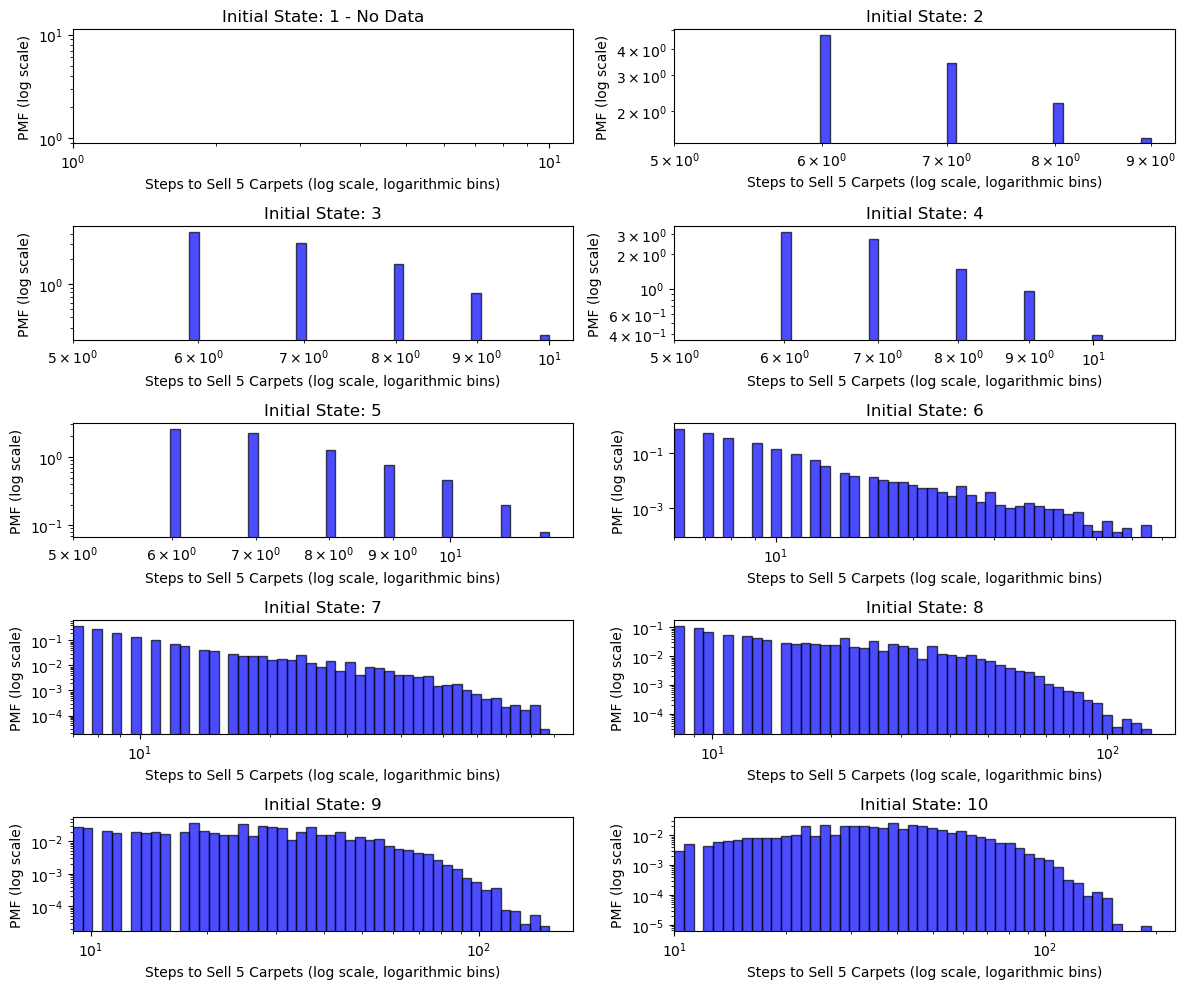

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(12, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    valid_times = times_to_sell_5[i][times_to_sell_5[i] > 0]

    if len(valid_times) > 0:
        min_time = np.min(valid_times)
        max_time = np.max(valid_times)
        
        #bins = np.linspace(min_time, max_time, 50)
        bins = np.logspace(np.log10(min_time), np.log10(max_time), 50)
        
        counts, bins, _ = ax.hist(valid_times, bins=bins, density=True, alpha=0.7, color='blue', edgecolor='black')
        
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_title(f"Initial State: {i + 1}")
        ax.set_xlabel("Steps to Sell 5 Carpets (log scale, logarithmic bins)")
        ax.set_ylabel("PMF (log scale)")
        ax.set_xlim(left=min_time)
    else:
        ax.set_title(f"Initial State: {i + 1} - No Data")
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel("Steps to Sell 5 Carpets (log scale, logarithmic bins)")
        ax.set_ylabel("PMF (log scale)")
        ax.set_xlim(left=1)

plt.tight_layout()
plt.show()


Part d) answer: This seems to be a log-normal distribution.

Part e)

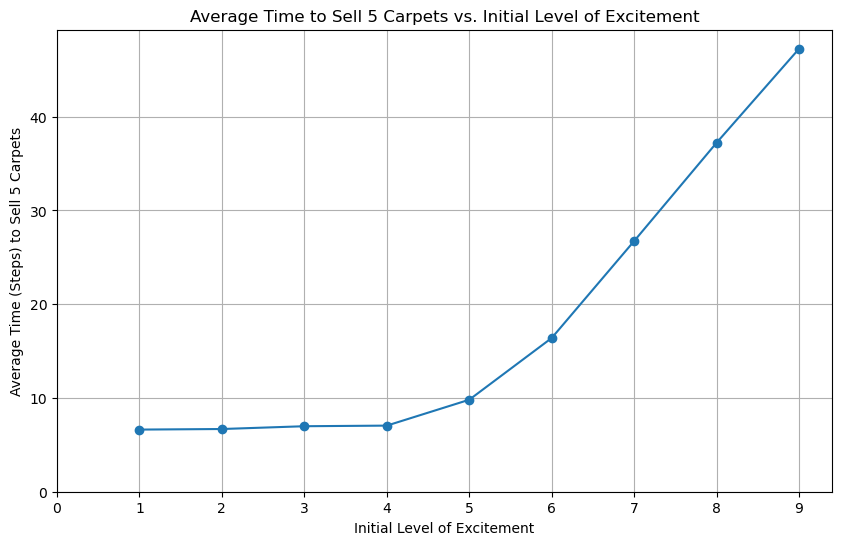

In [10]:
average_times = []
for initialState in stateSpace:
    valid_times = times_to_sell_5[initialState][times_to_sell_5[initialState] != -1]
    avg_time = np.mean(valid_times) if len(valid_times) > 0 else np.nan
    average_times.append(avg_time)

plt.figure(figsize=(10, 6))
plt.plot(stateSpace, average_times, marker='o', linestyle='-')
plt.title("Average Time to Sell 5 Carpets vs. Initial Level of Excitement")
plt.xlabel("Initial Level of Excitement")
plt.ylabel("Average Time (Steps) to Sell 5 Carpets")
plt.xticks(stateSpace)
plt.grid()
plt.ylim(bottom=0)
plt.show()

Part f)

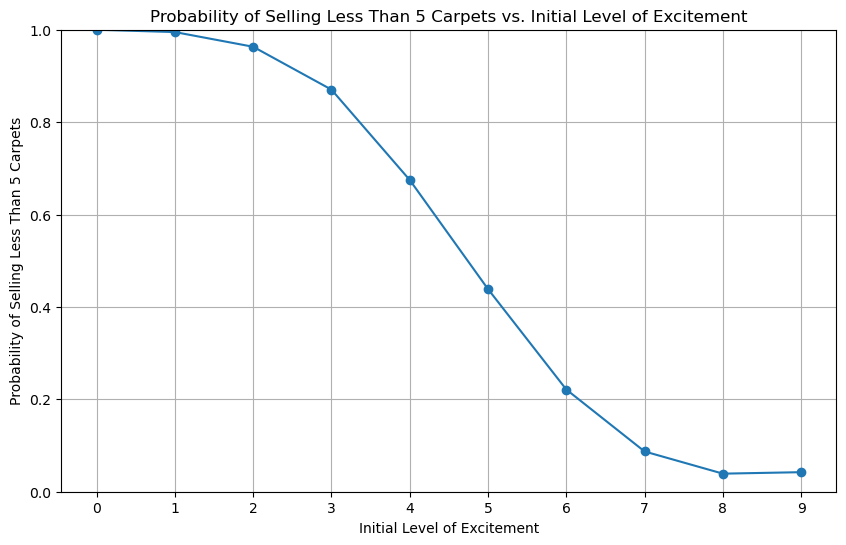

In [11]:
probabilities = []
for initialState in stateSpace:
    less_than_five = np.sum(times_to_sell_5[initialState] < 5)
    probability = less_than_five / trials
    probabilities.append(probability)

plt.figure(figsize=(10, 6))
plt.plot(stateSpace, probabilities, marker='o', linestyle='-')
plt.title("Probability of Selling Less Than 5 Carpets vs. Initial Level of Excitement")
plt.xlabel("Initial Level of Excitement")
plt.ylabel("Probability of Selling Less Than 5 Carpets")
plt.xticks(stateSpace)
plt.grid()
plt.ylim(0, 1)
plt.show()

Part g) 

According to the Central Limit Theorem the distribution should converge to the Normal Distribution as the number of trials increases. However this MCMC process produces a log-normal distribution in d) for high initial levels of excitement due to the way the corresponding Markov Chain was constructed. It was not uniform and it's transition probabilities were 'skewed' (for high initial levels you were more probable to stay at those states and sell more and for low levels it was probable to sell even less) resulting in a skewed distribution. Additionally since the probabilities were 'skewed' the results have high variance, which further adds to the skewness with this number of trials and slows down the convergence to a normal distribution resulting in a log-normal distribution or a fat-tailed one.

$\textbf{Question 2}$

Part a)

$$\frac{dN}{dt} = - \lambda_c N_0$$

The interarrival times of a Poisson process are exponentially distributed as Exp($\lambda_c N_0$)

So we sample with the inverse-distribution method $\Delta t = -\frac{1}{\lambda_c N_0} ln(U)$, where $U \sim \text{Uniform}(0,1)$

In [12]:
N0 = 10000
lambda_0 = 0.2
num_simulations = 1000
lmbda = lambda_0 * N0

def homogenous(N0, lmbda):
    total_time = 0
    count = 0
    while count < N0 / 2:
        U = np.random.uniform() # Sample a random number from the Uniform(0,1) distribution
        delta_t = -np.log(U) / lmbda # Sample a time until the next decay from the exponential distribution
        total_time += delta_t # Increment the cumulative time by this sampled time
        count += 1 # Increase the number of decays happened so far
    return total_time

half_times = []

for _ in range(num_simulations): # Run the simulation for sum_simulations times
    half_time = homogenous(N0, lmbda)
    half_times.append(half_time)

half_times = np.array(half_times)

mean_half_time = np.mean(half_times) # Compute the mean of the half times across all simulations
variance_half_time = np.var(half_times) # Compute the variance of the half times across all simulations

print(f"Mean half time: {mean_half_time} seconds")
print(f"Variance of half time: {variance_half_time} seconds^2")

Mean half time: 2.5006330829650625 seconds
Variance of half time: 0.0012873804555631164 seconds^2


Part a) answer:

Mean of the half times: $\textbf{2.4994}$ seconds.

Variance of the half times $\textbf{0.0012837}$ seconds^2.

Part b)

In [13]:
def inhomogenous(N0, lambda_0):
    N_t = N0
    total_time = 0
    while N_t > N0 / 2:
        U = np.random.uniform() # Sample a random number from the uniform distribution
        delta_t = -np.log(U) / (lambda_0 * N_t) # Sample a exponentially distributed with parameter lambda_0 * N_t interarrival time
        total_time += delta_t # Increment the cumulative time by this time
        N_t -= 1 # Decrease the number of nucleii
    return total_time

half_times = []

for _ in range(num_simulations): # Run num_simulations
    half_time = inhomogenous(N0, lambda_0)
    half_times.append(half_time)

half_times = np.array(half_times)

mean_half_time = np.mean(half_times) # Compute the mean of the half times across all simulations
variance_half_time = np.var(half_times) # Compute the variance of the half times across all simulations

print(f"Mean half time: {mean_half_time} seconds")
print(f"Variance of half time: {variance_half_time} seconds^2")

Mean half time: 3.4659930944895962 seconds
Variance of half time: 0.0024766364371718243 seconds^2


Part b) answer:

Mean of the half times: $\textbf{3.4662}$ seconds.

Variance of the half times: $\textbf{0.0026926}$ seconds^2.